In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

__Data Exploration__

In [3]:
dataset = pd.read_csv('Melbourne_housing_FULL.csv')
dataset

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [4]:
dataset.nunique() #checking for unique values in a dataset.

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [5]:
# taking only columns that are required.
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount', 
               'Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']

In [6]:
dataset = dataset[cols_to_use]
dataset

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,4,h,PI,Jas,Western Metropolitan,6543.0,6.3,Maribyrnong City Council,4.0,1.0,3.0,593.0,NaN,1480000.0
34853,Yarraville,2,h,SP,Sweeney,Western Metropolitan,6543.0,6.3,Maribyrnong City Council,2.0,2.0,1.0,98.0,104.0,888000.0
34854,Yarraville,2,t,S,Jas,Western Metropolitan,6543.0,6.3,Maribyrnong City Council,2.0,1.0,2.0,220.0,120.0,705000.0
34855,Yarraville,3,h,SP,hockingstuart,Western Metropolitan,6543.0,6.3,Maribyrnong City Council,NaN,NaN,NaN,NaN,NaN,1140000.0


__Handling Missing Values__

In [7]:
dataset.isna().sum() #checking for any missing values

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [8]:
 #filling some of the na columns with 0
cols_to_fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']
dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0)

In [9]:
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        0
Distance             0
CouncilArea          3
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [10]:
# filling some of the na columns with mean values
dataset['Landsize'] = dataset['Landsize'].fillna(dataset.Landsize.mean())
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset.BuildingArea.mean())

In [11]:
dataset.isna().sum()

Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Regionname          3
Propertycount       0
Distance            0
CouncilArea         3
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
Price            7610
dtype: int64

__Dropping off other columns which doesnt add much to our data__

In [12]:
dataset.dropna(inplace=True)

In [13]:
dataset.isna().sum()

Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Price            0
dtype: int64

In [14]:
dataset.nunique()

Suburb            344
Rooms              12
Type                3
Method              5
SellerG           349
Regionname          8
Propertycount     336
Distance          213
CouncilArea        33
Bedroom2           14
Bathroom           10
Car                13
Landsize         1558
BuildingArea      663
Price            2871
dtype: int64

In [15]:
# sorting the objects dtype to understand on what columns will one hot encoding be applied.
dataset.dtypes[dataset.dtypes =='object']

Suburb         object
Type           object
Method         object
SellerG        object
Regionname     object
CouncilArea    object
dtype: object

In [16]:
#Accessing the counts of the column with object type.
dataset.nunique()[dataset.dtypes =='object']

Suburb         344
Type             3
Method           5
SellerG        349
Regionname       8
CouncilArea     33
dtype: int64

In [17]:
dataset.nunique()[dataset.dtypes =='object'].sum()

742

__One Hot Encoding__

In [18]:
dataset = pd.get_dummies(dataset, drop_first=True)
dataset  
# Previously: 15 columns
# After Encoding: 745 columns

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.000000,160.2564,1480000.0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,4019.0,2.5,2.0,1.0,0.0,156.000000,79.0000,1035000.0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,4019.0,2.5,3.0,2.0,0.0,134.000000,150.0000,1465000.0,0,...,0,0,0,0,0,0,0,0,1,0
5,3,4019.0,2.5,3.0,2.0,1.0,94.000000,160.2564,850000.0,0,...,0,0,0,0,0,0,0,0,1,0
6,4,4019.0,2.5,3.0,1.0,2.0,120.000000,142.0000,1600000.0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,6543.0,6.3,4.0,1.0,3.0,593.000000,160.2564,1480000.0,0,...,0,0,0,0,0,0,0,0,0,0
34853,2,6543.0,6.3,2.0,2.0,1.0,98.000000,104.0000,888000.0,0,...,0,0,0,0,0,0,0,0,0,0
34854,2,6543.0,6.3,2.0,1.0,2.0,220.000000,120.0000,705000.0,0,...,0,0,0,0,0,0,0,0,0,0
34855,3,6543.0,6.3,0.0,0.0,0.0,593.598993,160.2564,1140000.0,0,...,0,0,0,0,0,0,0,0,0,0


__Splitting X and y__

In [19]:
X= dataset.drop('Price', axis = 'columns')
X

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Suburb_Aberfeldie,Suburb_Airport West,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.000000,160.2564,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,4019.0,2.5,2.0,1.0,0.0,156.000000,79.0000,0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,4019.0,2.5,3.0,2.0,0.0,134.000000,150.0000,0,0,...,0,0,0,0,0,0,0,0,1,0
5,3,4019.0,2.5,3.0,2.0,1.0,94.000000,160.2564,0,0,...,0,0,0,0,0,0,0,0,1,0
6,4,4019.0,2.5,3.0,1.0,2.0,120.000000,142.0000,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,6543.0,6.3,4.0,1.0,3.0,593.000000,160.2564,0,0,...,0,0,0,0,0,0,0,0,0,0
34853,2,6543.0,6.3,2.0,2.0,1.0,98.000000,104.0000,0,0,...,0,0,0,0,0,0,0,0,0,0
34854,2,6543.0,6.3,2.0,1.0,2.0,220.000000,120.0000,0,0,...,0,0,0,0,0,0,0,0,0,0
34855,3,6543.0,6.3,0.0,0.0,0.0,593.598993,160.2564,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
y = dataset['Price']
y

1        1480000.0
2        1035000.0
4        1465000.0
5         850000.0
6        1600000.0
           ...    
34852    1480000.0
34853     888000.0
34854     705000.0
34855    1140000.0
34856    1020000.0
Name: Price, Length: 27244, dtype: float64

__TrainTest Split__

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 2) # (flattened 2d array,1d array)

In [22]:
len(X_train), len(X_test), len(y_train), len(y_test)

(19070, 8174, 19070, 8174)

__Fitting to linear Regression__

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
model.score(X_test,y_test)

0.1385368316150991

We see that our score is too less on test model.
Checking for training model below.

In [25]:
model.score(X_train,y_train)

0.6827792395792723

We see that our model is overfitted as the train score is too much more than test score.

__Trying score with Lasso Regression (L1 REGULARIZATION)__

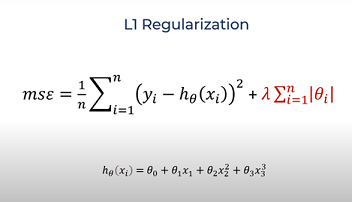

In [26]:
# Normal Lasso model without parameter tuning
from sklearn.linear_model import Lasso
model_lasso = Lasso()
model_lasso.fit(X_train, y_train)

Lasso()

In [27]:
model_lasso.score(X_test,y_test) # very less accuracy without parameter tuning for test set

0.15699328631539766

In [28]:
model_lasso.score(X_train, y_train) #checking on train set

0.682762928895254

In [29]:
# Lasso model with parameter tuning
from sklearn.linear_model import Lasso
model_lasso_p = Lasso(alpha = 50,max_iter = 100, tol = 0.1)
model_lasso_p.fit(X_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [30]:
model_lasso_p.score(X_test,y_test)

0.6636111369404487

In [31]:
model_lasso_p.score(X_train, y_train)

0.6766985624766824

In [32]:
# Ridge model with parameter tuning
from sklearn.linear_model import Ridge
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)

Ridge()

In [33]:
model_ridge.score(X_test,y_test) #test set score

0.670176575829528

In [34]:
model_ridge.score(X_train, y_train) # train set score

0.6796668251040214